In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('C:\\Users\\Riyaz\\Desktop\\lrlor\\Logistic Regression Problem_ Data Set.xlsx')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 03:36:18,0.0


In [17]:
X = df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis =1)

In [18]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35.0,61833.90,256.09,0.0
1,80.23,31.0,68441.85,193.77,1.0
2,69.47,26.0,59785.94,236.50,0.0
3,74.15,29.0,54806.18,245.89,1.0
4,68.37,35.0,73889.99,225.58,0.0


In [20]:
y = df['Clicked on Ad']

In [21]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Clicked on Ad, dtype: float64

In [14]:
# df['Timestamp'].value_counts()
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [10]:
len(df)

1000

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   float64       
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   float64       
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 78.2+ KB


In [23]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [24]:
df['Clicked on Ad'].value_counts()

0.0    500
1.0    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

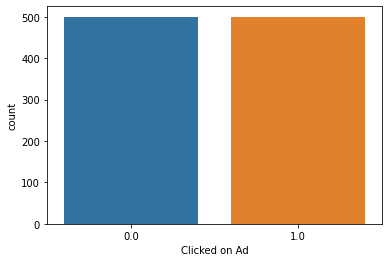

In [25]:
sns.countplot(data=df,x='Clicked on Ad')

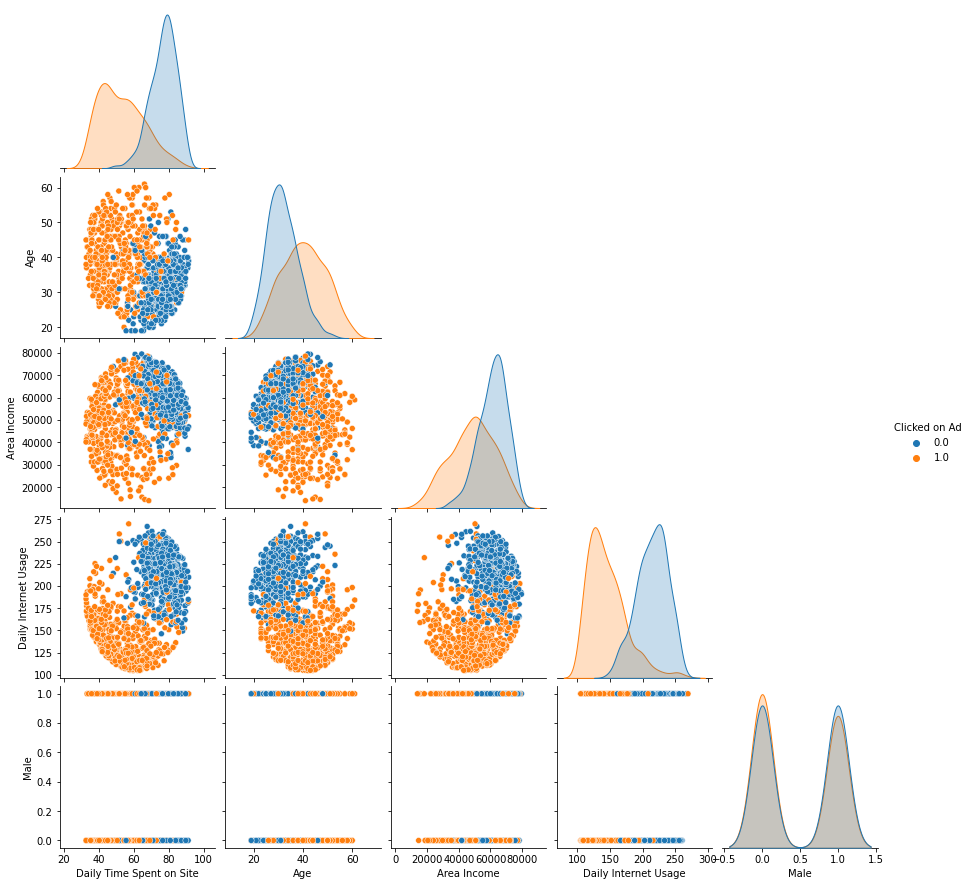

In [27]:
sns.pairplot(df,hue='Clicked on Ad', corner=True)

In [33]:
# sns.scatterplot(x=df['Male'], y=df['Clicked on Ad'])
# plt.plot(df['Male'],df['Clicked on Ad'])

In [34]:
df['Male'].value_counts()

0.0    519
1.0    481
Name: Male, dtype: int64

<AxesSubplot:>

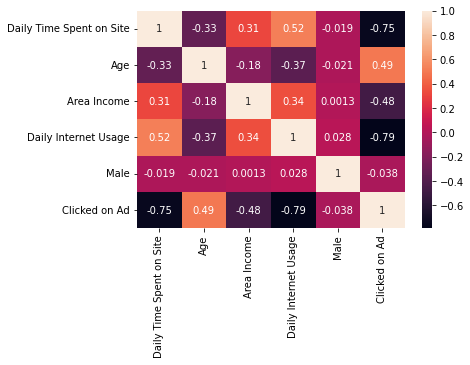

In [35]:
sns.heatmap(df.corr(),annot=True)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [73]:
scaler = StandardScaler()

In [74]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# '''
# When you call StandardScaler.fit (X_train), what it does is calculate the mean and variance from the values in X_train. 
# Then calling .transform () will transform all of the features by subtracting the mean and dividing by the variance. 
# For convenience, these two function calls can be done in one step using fit_transform ().

# '''

In [42]:
scaled_X_train.shape

(900, 5)

In [79]:
scaled_X_test.shape

(100, 5)

In [44]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_model = LogisticRegression()

In [81]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [82]:
log_model.coef_

array([[-2.67381651,  1.16508936, -1.50609968, -2.41449355, -0.19565002]])

In [83]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 03:36:18,0.0


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [85]:
y_pred = log_model.predict(scaled_X_test)

In [87]:
y_pred.shape

(100,)

In [88]:
accuracy_score(y_test,y_pred)

0.97

In [124]:
from sklearn.metrics import precision_score, recall_score

In [89]:
confusion_matrix(y_test,y_pred)

array([[47,  0],
       [ 3, 50]], dtype=int64)

In [128]:
# Recall 47/50
# Precision 47/47

In [125]:
recall_score(y_test,y_pred)

0.9433962264150944

In [126]:
precision_score(y_test,y_pred)

1.0

In [127]:
(1+0.94)/2

0.97

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


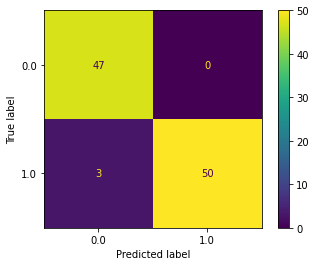

In [95]:
plot_confusion_matrix(log_model,scaled_X_test,y_test) # can apply normailze='True'


In [101]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.svm import SVC

In [102]:
# clf = SVC(random_state=0)
# clf.fit(X_train, y_train)
# SVC(random_state=0)

# cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
# disp.plot()
# plt.show()

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        47
         1.0       1.00      0.94      0.97        53

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [131]:
log_model.predict_proba(scaled_X_test)[7]

array([0.003475, 0.996525])

In [132]:
y_test[7]

1.0

In [133]:
# 0% probability of 0 class
# 100% probability of 1 class
# log_model.predict_proba([X_train.iloc[5]]) # .values.reshape(1, -1)

In [134]:
# log_model.predict([X_train.iloc[5]]) # .values.reshape(1, -1)

In [135]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


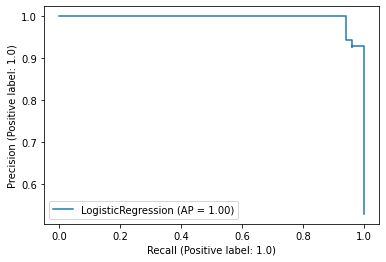

In [136]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


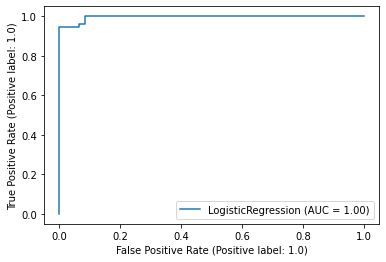

In [137]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [140]:
# plt.figure(figsize = (10,6), dpi=150)

# sns.kdeplot(x=y_test, label='actual')
# sns.kdeplot(x=y_pred, label='prediction')

# plt.legend()